In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno

In [32]:
df=pd.read_csv('aps_failure_test_set.csv',na_values='na') #changing "na" to a real NaN

In [33]:
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2324\3062671800.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Negative', 'Positive'])


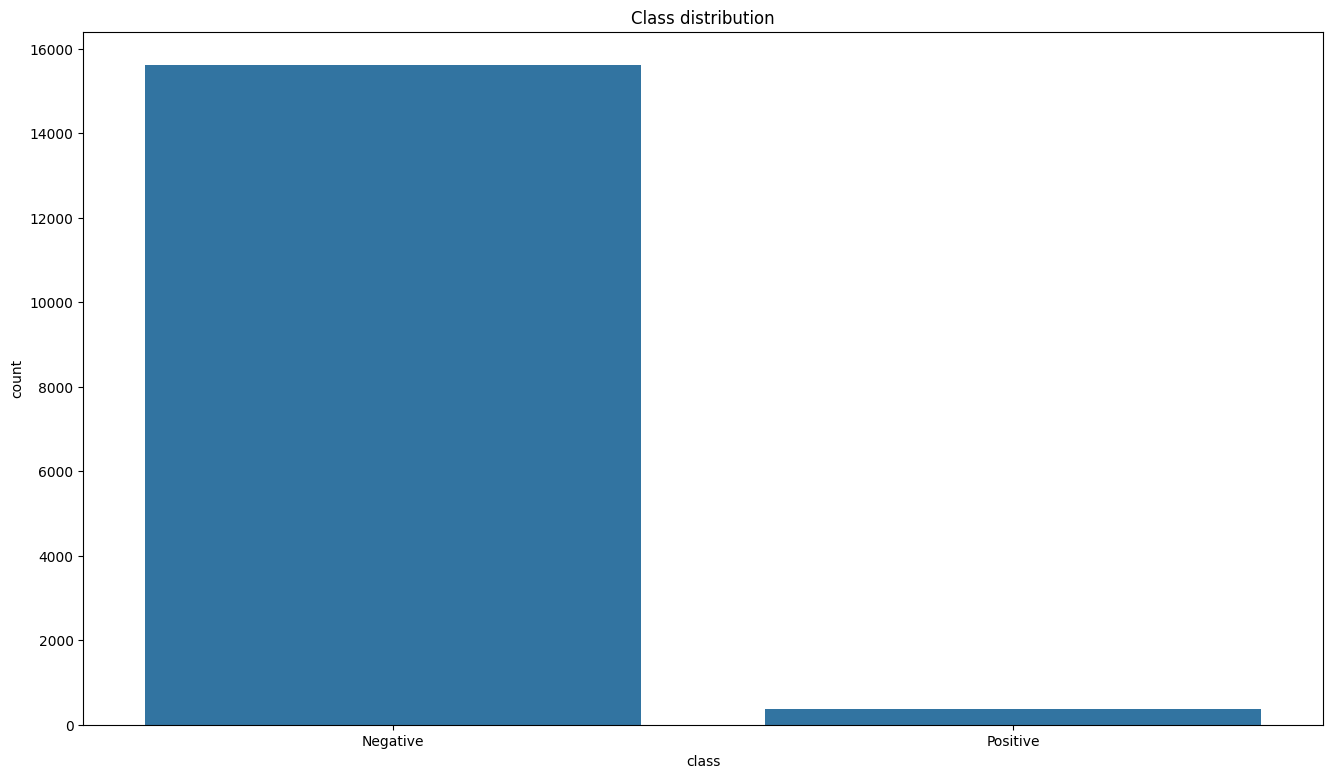

class
neg    0.976562
pos    0.023438
Name: proportion, dtype: float64


In [34]:
#---analyzing class imbalance---
plt.figure(figsize=(16,9))
ax = sns.countplot(x='class', data=df)

ax.set_xticklabels(['Negative', 'Positive'])
plt.title("Class distribution")
plt.show()
print(df['class'].value_counts(normalize=True))
#---extreme class imbalance--- negative (around 98%), positive (around 2%) ---

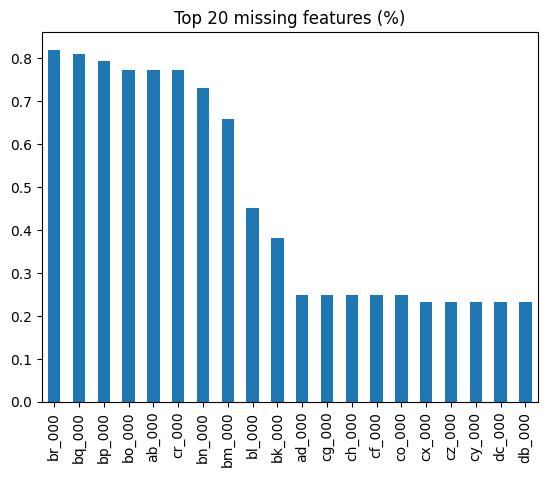

In [35]:
#---identifying missing value patterns---
missing_val= df.isnull().mean().sort_values(ascending=False)
#---visualising top missing columns---
missing_val.head(20).plot(kind='bar',title='Top 20 missing features (%)')
plt.show()


<Figure size 1200x800 with 0 Axes>

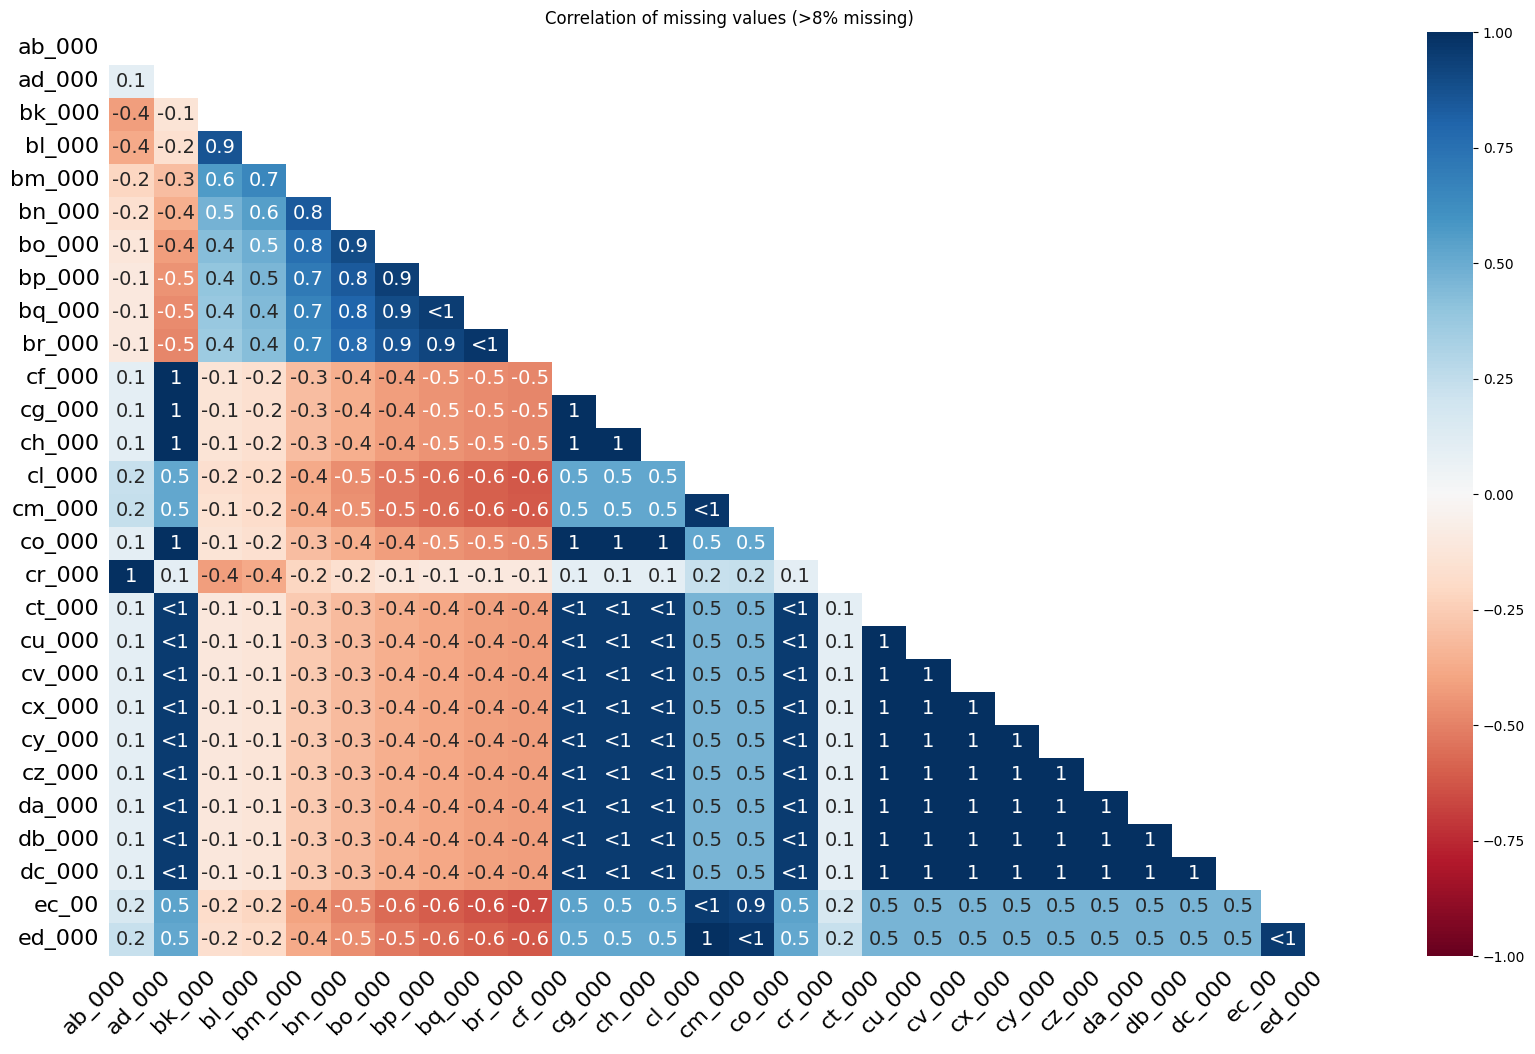

In [36]:
cols_with_missing=df.columns[df.isnull().mean() > 0.08]
plt.figure(figsize=(12,8))
msno.heatmap(df[cols_with_missing])
plt.title("Correlation of missing values (>8% missing)")
plt.show()
#---the heatmap reveals data is missing in correlated blocks --- not missing randomly ---

In [37]:
#---dropping columns with >50% of data missing
col_drop=missing_val[missing_val>0.5].index
df2=df.drop(columns=col_drop)

In [38]:
df2

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


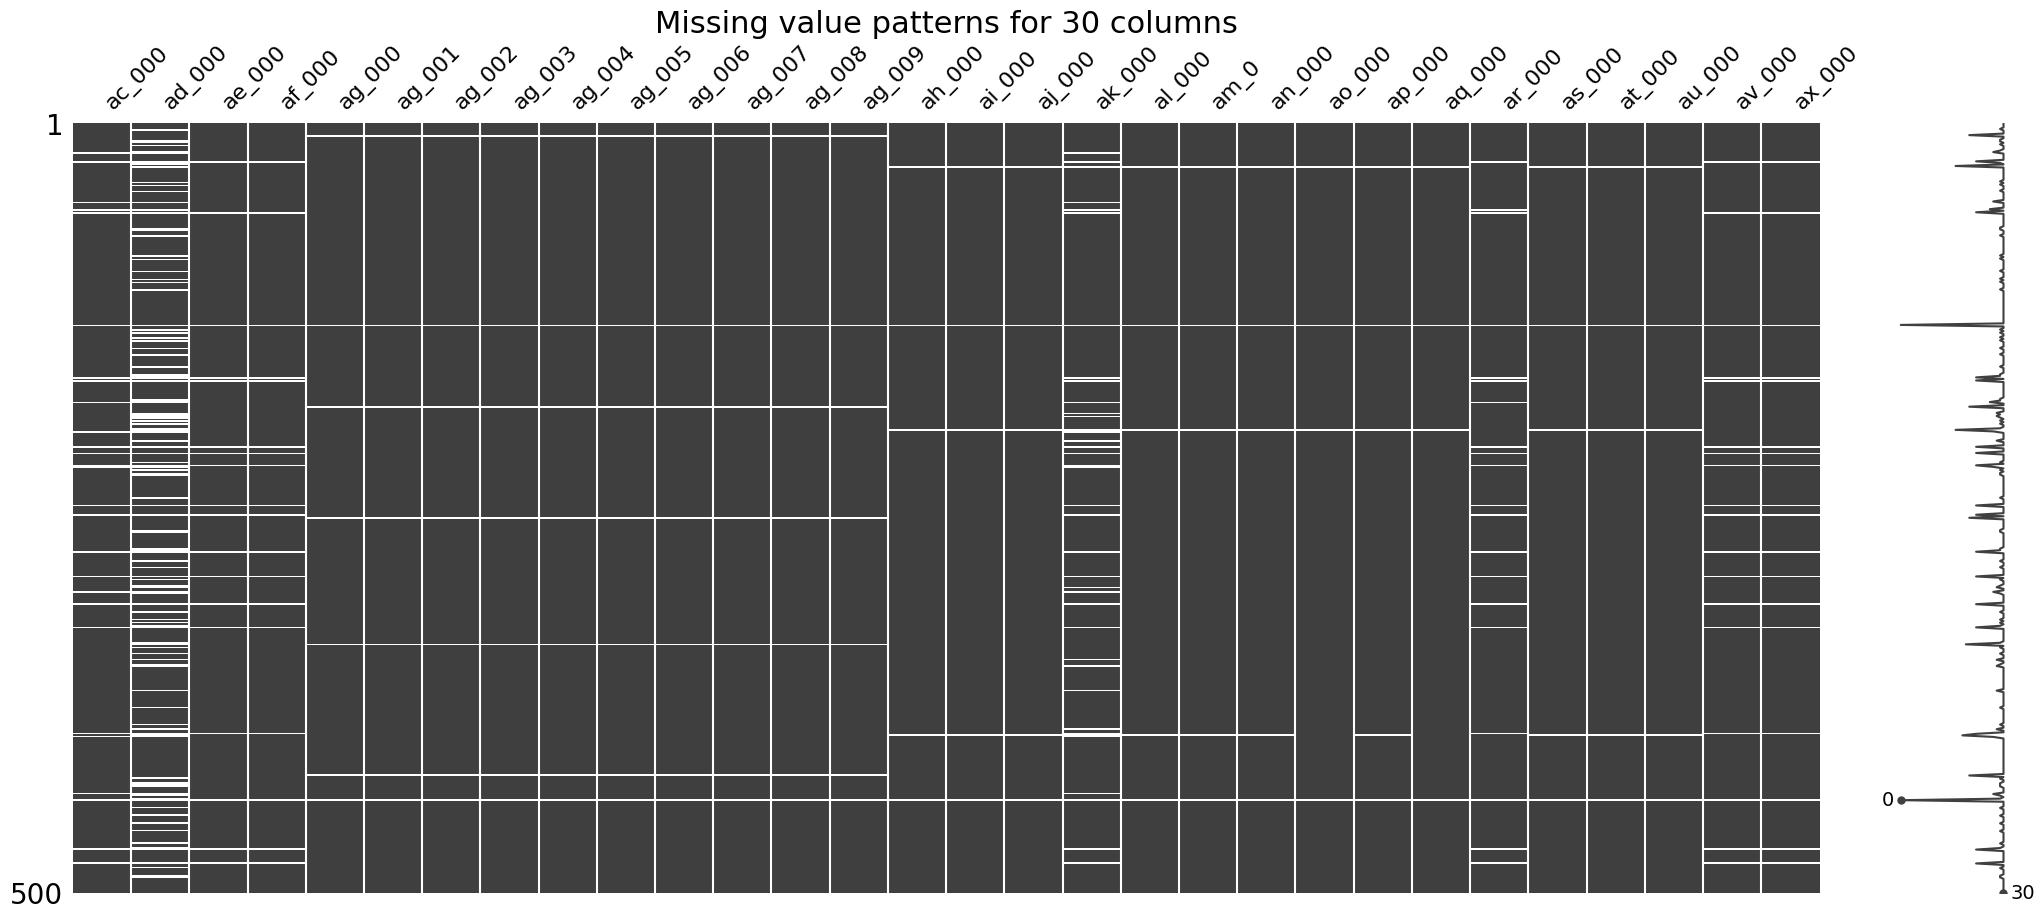

In [41]:
cols_with_missing = df2.columns[df2.isnull().any()]
msno.matrix(df2[cols_with_missing].iloc[:, :30].sample(500))
plt.title("Missing value patterns for 30 columns", fontsize=22)
plt.show()

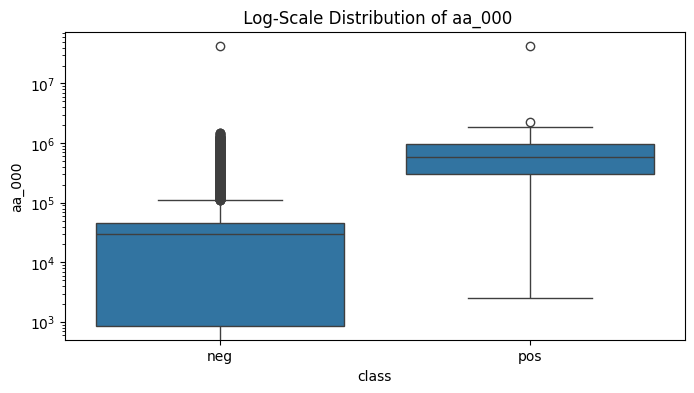

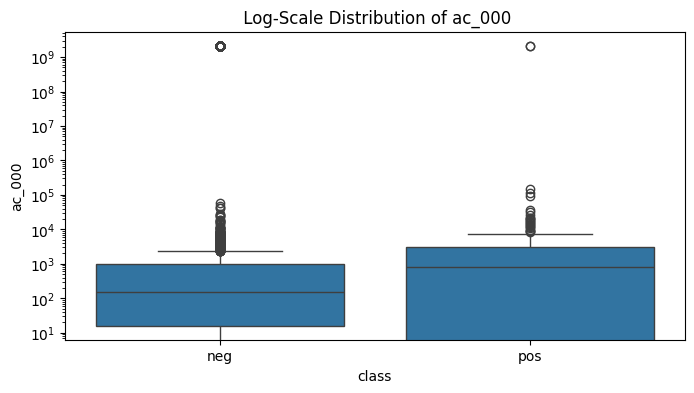

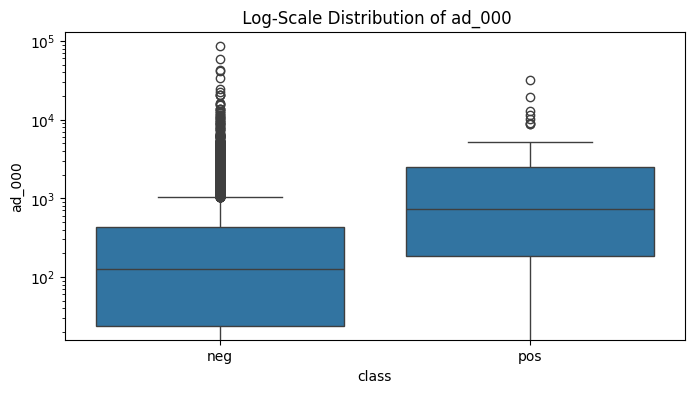

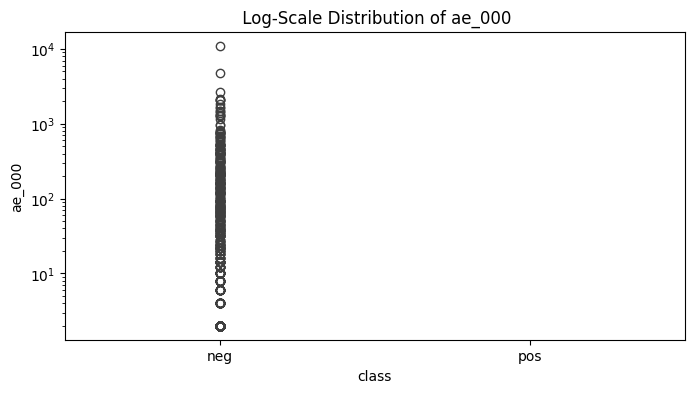

In [39]:
selected_cols = df2.columns[1:5]
for col in selected_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='class', y=col, data=df2)
    plt.yscale('log')
    plt.title(f' Log-Scale Distribution of {col}')
    plt.show()

In [42]:
print("Skewness of top features:\n", df2[top_features].skew())
#---very high skewness --- robust imputation&log transformations ---

Skewness of top features:
 ci_000    5.454277
bb_000    6.215672
bv_000    6.221509
bu_000    6.221509
cq_000    6.221509
by_000    6.375570
dtype: float64


The missingness is not completely random. Some sensors fail in batches, suggesting they belong to the same subsystem. 
We dropped columns with >50% missing values, but for the remaining ones, we need a ROBUST IMPUTATION strategy like MEDIAN REPLACEMENT because of extreme outliers.

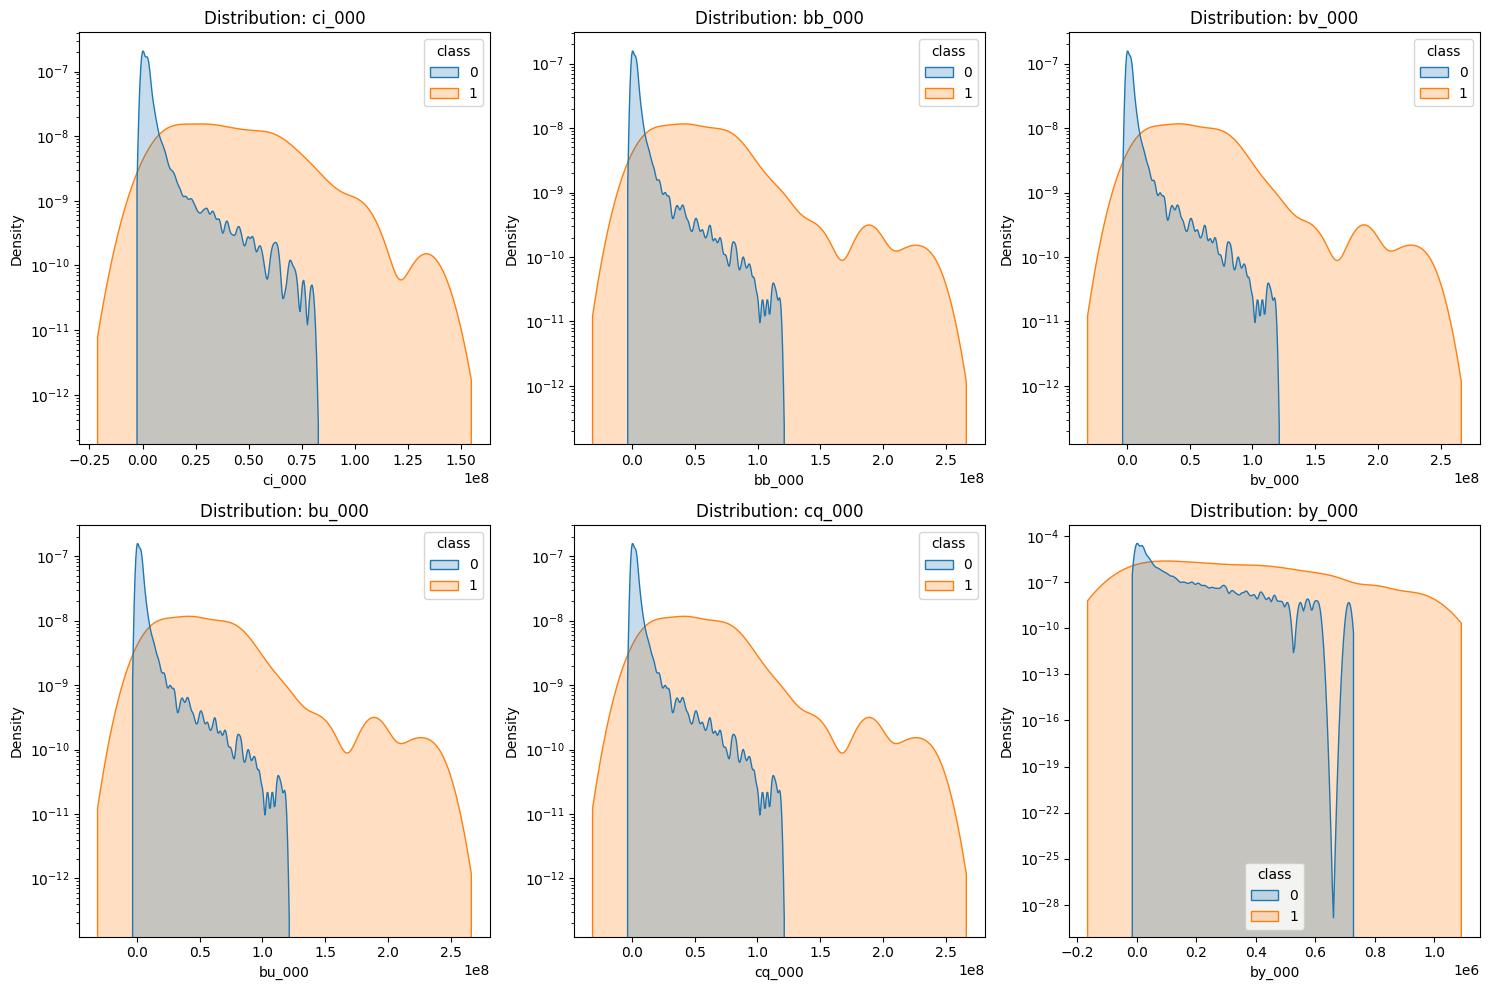

In [40]:
#---mapping class labels to numerical values for correlation analysis---
df2['class'] = df2['class'].map({'neg': 0, 'pos': 1})


#---identifying top features that correlate with the target class---
#---high absolute correlation suggests these sensors are key indicators of failure---
top_features = df2.corr()['class'].abs().sort_values(ascending=False).head(7).index[1:]

#---log scale used due to the extreme skewness in sensor data---
plt.figure(figsize=(15, 10))
for i, col in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(data=df2, x=col, hue='class', fill=True, common_norm=False)
    plt.title(f'Distribution: {col}')
    plt.yscale('log') 
plt.tight_layout()
plt.show()



1. EXTREME CLASS IMBALANCE (only 1.6% is positive) -> We must use techniques like SMOTE or class_weight='balanced' during training to avoid a model that always predicts 'no failure'.
2. OUTLIER DOMINANCE (descriptive statistics show massive variance and skewness) -> Models will fail without ROBUST SCALER.
3. COST SENSITIVITY -> Our evaluation metric should be RECALL or a custom Cost-based metric, not just Accuracy.
4. FEATURE REDUNDANCY -> High correlation between some sensors sugessts potential use of PCA to reduce dimensionality.